<a href="https://colab.research.google.com/github/ozziardhi/Colab/blob/main/simple%20linear%20regretion%20house%20market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
 df = pd.read_csv('/content/drive/MyDrive/archive_3/house.csv')

In [55]:
df.head()

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
0,1,26.184098,1286.68,204.003817,22,67,96004.804557
1,1,34.866901,1855.25,186.980360,8,30,92473.722568
2,1,36.980709,692.09,111.224999,24,24,98112.519942
3,1,17.445723,1399.49,237.998760,1,66,92118.326874
4,1,52.587646,84.65,100.996400,20,3,98976.653176


In [56]:
df.describe()

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
count,4308.000000,4308.000000,4308.000000,4308.000000,4308.000000,4308.000000,4308.000000
mean,3.732823,118.941327,1090.544301,105.665358,9.397168,48.576834,95701.196185
std,2.476989,95.469802,555.325830,60.750825,7.517018,27.621465,3919.823988
min,1.000000,10.244518,11.800000,1.245338,1.000000,0.000000,86113.592974
25%,2.000000,52.240659,635.897500,56.156897,2.000000,25.000000,92934.251436
50%,3.000000,91.828201,1143.135000,101.388012,8.000000,48.000000,95337.792918
75%,5.000000,150.987591,1554.280000,148.481068,16.000000,72.000000,97980.675094
max,17.000000,750.971604,1999.840000,330.275317,24.000000,97.000000,118134.771190


In [64]:
cdf=df[['bedroom_count','age','net_sqm','price','center_distance']]
cdf.head(9)

,bedroom_count,age,net_sqm,price,center_distance
0,1,67,26.184098,96004.804557,1286.68
1,1,30,34.866901,92473.722568,1855.25
2,1,24,36.980709,98112.519942,692.09
3,1,66,17.445723,92118.326874,1399.49
4,1,3,52.587646,98976.653176,84.65
5,1,23,22.425584,91491.714107,1901.10
6,1,0,33.033900,93381.409435,1833.94
7,1,12,27.883480,93503.284600,1384.89
8,1,18,69.765100,98708.323548,640.89


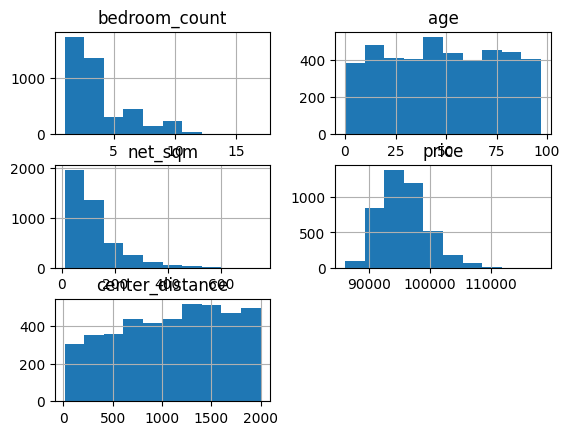

In [65]:
viz=cdf[['bedroom_count','age','net_sqm','price','center_distance']]
viz.hist()
plt.show()

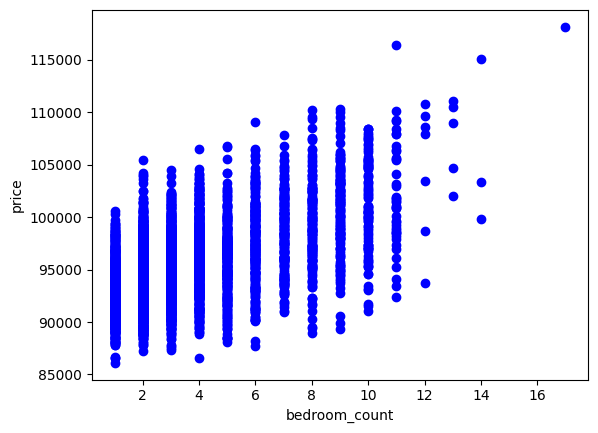

In [66]:
plt.scatter(cdf.bedroom_count, cdf.price,  color='blue')
plt.xlabel("bedroom_count")
plt.ylabel("price")
plt.show()

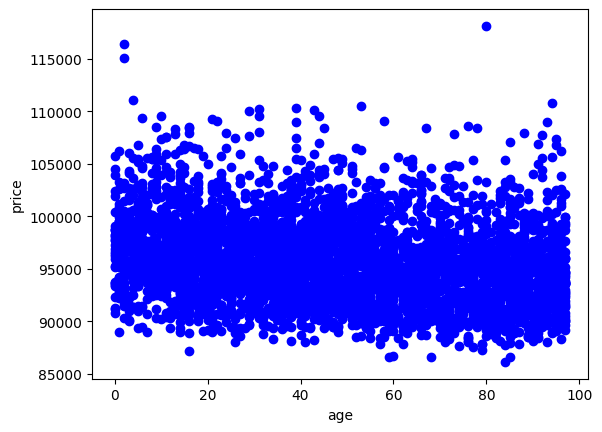

In [67]:
plt.scatter(cdf.age, cdf.price,  color='blue')
plt.xlabel("age")
plt.ylabel("price")
plt.show()

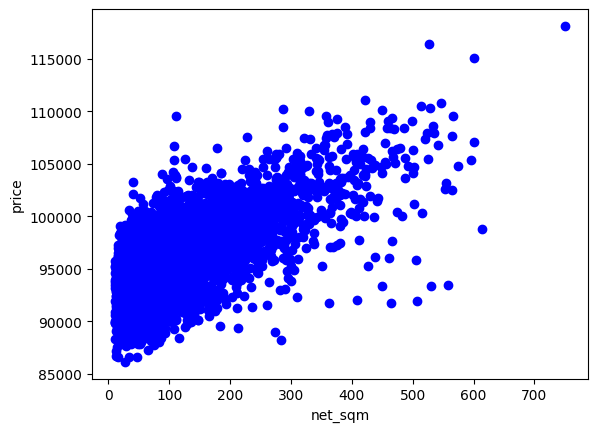

In [68]:
plt.scatter(cdf.net_sqm, cdf.price,  color='blue')
plt.xlabel("net_sqm")
plt.ylabel("price")
plt.show()

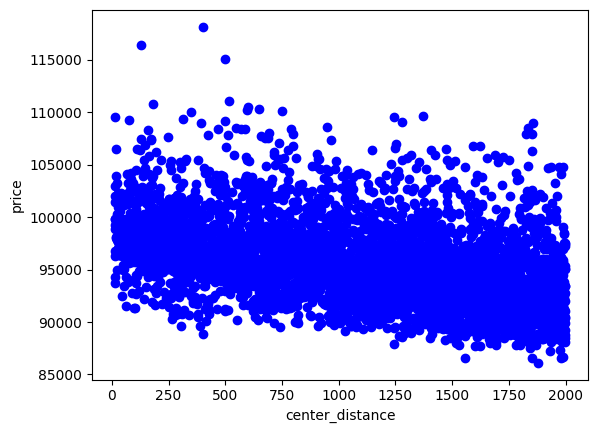

In [71]:
plt.scatter(cdf.center_distance, cdf.price, color='blue')
plt.xlabel("center_distance")
plt.ylabel("price")
plt.show()

In [73]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

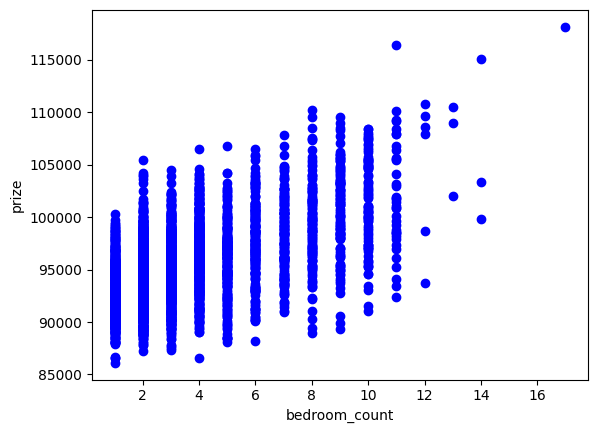

In [75]:
plt.scatter(train.bedroom_count, train.price,  color='blue')
plt.xlabel("bedroom_count")
plt.ylabel("prize")
plt.show()

In [76]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['bedroom_count']])
train_y = np.asanyarray(train[['price']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[879.29675782]]
Intercept:  [92420.47227146]


In [77]:
train_x.shape

(3456, 1)

Text(0, 0.5, 'price')

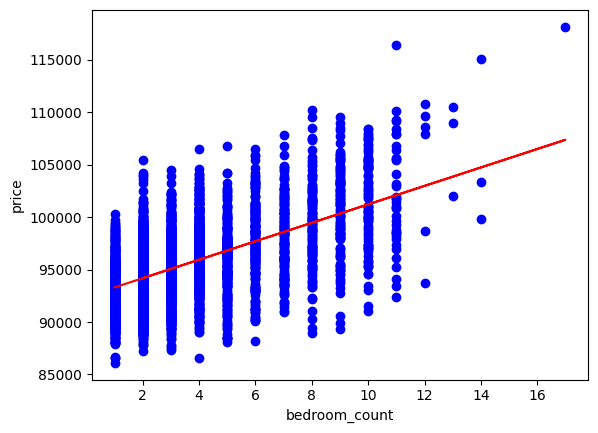

In [78]:
plt.scatter(train.bedroom_count, train.price,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("bedroom_count")
plt.ylabel("price")

In [79]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['bedroom_count']])
test_y = np.asanyarray(test[['price']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 2581.57
R2-score: -1.38
